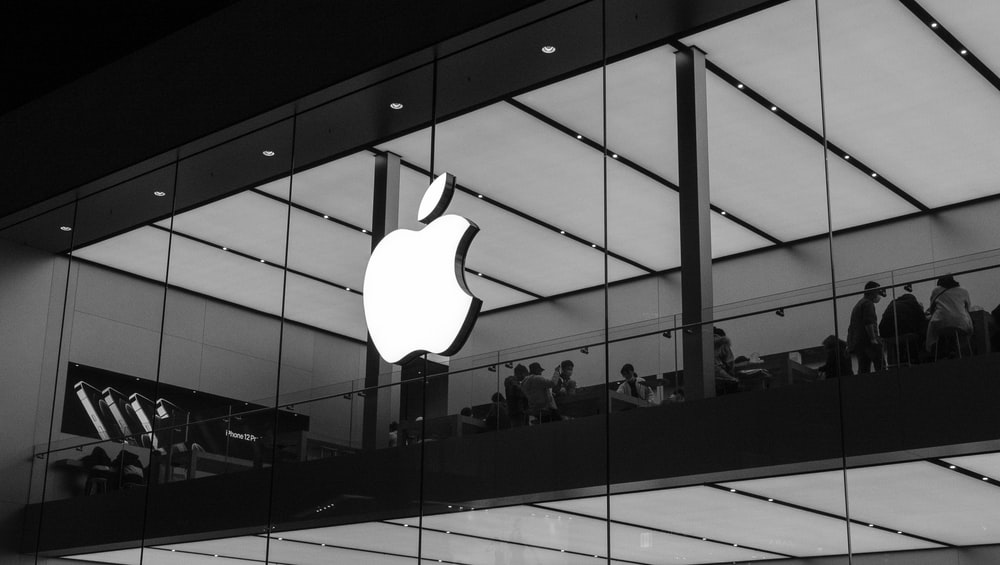

**Hello I am Patrick. In this mini project of My I am going to Predict Apples next 30 days stock Price using STACKED LSTM model. By which we will take last 100 days records to predict the next 30 days price. Thats How LSTM works. It is Known as a LONG SHORT TERM MEMORY.**

# Lets Start

Here I imporeted some basic Python Libraires. Then I am using a public Library TINGO to collect the real time data.

In [39]:
import pandas_datareader as pdr


In [40]:

df=pdr.get_data_tiingo('AAPL', api_key=key)

In [41]:
df.to_csv('AAPL.csv')

In [42]:
import pandas as pd
data=pd.read_csv('AAPL.csv')

* Here is our Dataset. Where we can see features like high,low open,close etc.Here I am going to take the close column for the stock prediction.

In [43]:
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-10 00:00:00+00:00,107.79,111.090,105.8300,111.09,57134541,25.362146,26.138610,24.900973,26.138610,228538164,0.00,1.0
1,AAPL,2016-11-11 00:00:00+00:00,108.43,108.870,106.5500,106.92,34143898,25.512733,25.616261,25.070384,25.157442,136575592,0.00,1.0
2,AAPL,2016-11-14 00:00:00+00:00,105.71,107.809,104.0800,107.32,51175504,24.872738,25.366616,24.489212,25.251559,204702016,0.00,1.0
3,AAPL,2016-11-15 00:00:00+00:00,107.11,107.680,106.1593,106.57,32264510,25.202147,25.336264,24.978455,25.075089,129058040,0.00,1.0
4,AAPL,2016-11-16 00:00:00+00:00,109.99,110.230,106.6000,106.70,58840522,25.879789,25.936259,25.082148,25.105677,235362088,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2021-11-02 00:00:00+00:00,150.02,151.570,148.6500,148.66,68922374,149.802149,151.349898,148.434139,148.444124,68922374,0.00,1.0
1253,AAPL,2021-11-03 00:00:00+00:00,151.49,151.970,149.8200,150.39,54511534,151.270015,151.749317,149.602440,150.171612,54511534,0.00,1.0
1254,AAPL,2021-11-04 00:00:00+00:00,150.96,152.430,150.6400,151.58,60394616,150.740784,152.208650,150.421249,151.359884,60394616,0.00,1.0
1255,AAPL,2021-11-05 00:00:00+00:00,151.28,152.200,150.0600,151.89,65463883,151.280000,152.200000,150.060000,151.890000,65463883,0.22,1.0


In [44]:
df=data.reset_index()['close']

In [45]:
df[1235:]

1235    142.90
1236    142.81
1237    141.51
1238    140.91
1239    143.76
1240    144.84
1241    146.55
1242    148.76
1243    149.26
1244    149.48
1245    148.69
1246    148.64
1247    149.32
1248    148.85
1249    152.57
1250    149.80
1251    148.96
1252    150.02
1253    151.49
1254    150.96
1255    151.28
1256    150.44
Name: close, dtype: float64

* Here we can see the graph from 2016 to till my data collected date. The graph reflects the conflict of price during the period. 

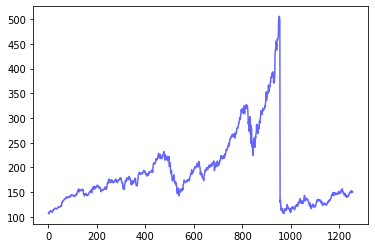

In [46]:
import matplotlib.pyplot as plt
plt.plot(df,color='Blue',alpha=0.60)
plt.show()

* Here I am using Min-max scaler to scaled down my data between 0 to 1 and then I used the Train_test_split to train my data:

In [47]:
import numpy as np

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

* Here we cann see all our data is scaled down between 0 to 1.

In [49]:
df

array([[0.00519506],
       [0.00679355],
       [0.        ],
       ...,
       [0.11301763],
       [0.11381687],
       [0.11171887]])

* Then I took my 65% Data for my training and the rest for testing.

In [50]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [51]:
training_size,test_size

(817, 440)

In [52]:
train_data

array([[0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.01328738],
       [0.01600979],
       [0.02058045],
       [0.01895699],
       [0.02367751],
       [0.02367751],
       [0.02525101],
       [0.02562566],
       [0.02729907],
       [0.02807333],
       [0.02834807],
       [0.0264249 ],
       [0.02699935],
       [0.02884759],
       [0.02759878],
       [0.02752385],
       [0.02525101],
       [0.02607523],
       [0.02575054],
       [0.02722414],
       [0.03047105],
       [0.03316849],
       [0.03346821],
       [0.03506669],
       [0.03381787],
       [0.03329337],
       [0.03569109],
       [0.03566612],
       [0.03514162],
       [0.035

* Then I defined a function and pass the X_train y_train, x_test, y_test to the defined function and we set the time_step as 100.

In [53]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)   

In [54]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

* Here we can see the shape of our trained and test data.

In [55]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [56]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

* After that we need to reshape our X trained and test data into a 3 dimension. The reason we are doing this because we are going to give X_train.shape[1] , 1 two to our LSTM model. And for test X_test.shape[1] , 1 this two we are going to give.

In [57]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

* Then I imported some sequential model and and Dense layer and LSTM from Keras. And we are going to compile it with mean_squared_error and the optimizer of our model will be adam.

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


* I have fitted my data to our Stacked LSTM model.

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 310ms/step - loss: 0.0144 - val_loss: 0.0252
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0035 - val_loss: 0.0249
Epoch 3/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0016 - val_loss: 0.0207
Epoch 4/100
12/12 [==============================] - 2s 199ms/step - loss: 6.6778e-04 - val_loss: 0.0222
Epoch 5/100
12/12 [==============================] - 2s 195ms/step - loss: 6.9733e-04 - val_loss: 0.0239
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 5.4159e-04 - val_loss: 0.0231
Epoch 7/100
12/12 [==============================] - 2s 198ms/step - loss: 4.6570e-04 - val_loss: 0.0247
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 4.6469e-04 - val_loss: 0.0239
Epoch 9/100
12/12 [==============================] - 2s 200ms/step - loss: 4.4277e-04 - val_loss: 0.0233
Epoch 10/100
12/12 [==============================] - 2s 201ms/step

In [24]:
import tensorflow as tf

* Then I predicted the values for X_train and also for the X_test.

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

* Lets get back into our data to the original shape.

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

* After that I have checked the Error using RMSE. The first one is for our Training Dataset and the second one is for our Test Dataset.

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

194.3740657248475

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

193.38112035717404

* Then I used matplotlib library for visualise what we have predicted.
So in the Graph We can See-
* The Green Part is our Predicted values that means our TEST data.

* The Orange part is our Trained Data.

* The Blue part behind the Orange and Green part line is our actual dataset or what I showed in the previous visualisation.

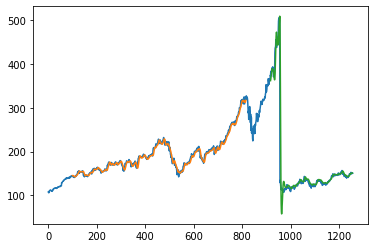

In [29]:
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

* As I told you before in the Intro Part of the project. I am going to predict the next 30 days with the help of my last 100 days records. So, here I took my previous 100 days data and reshaped it and make a list then I have used the matplotlib library to visualise my next 30 days predicton.

In [30]:
len(test_data)

440

In [31]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input


[0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692791847748,
 0.10682351765822468,
 0.1016034766971377,
 0.09176282531594981,
 0.10100404615615166,
 0.09913082571557025,
 0.1026275038713223,
 0.1070233278385534,
 0.1080973075578201,
 0.10255257505369902,
 0.0980818222688446,
 0.09973025625655624,
 0.10027973425246023,
 0.0994305409860633,
 0.10402617513362311,
 0.10300214795943852,
 0.10327688695739051,
 0.10097906988361055,
 0.10085418852090516,
 0.0996303511663919,
 0.10027973425246023,
 0.10784754483240916,
 0.10837204655577198,
 0.1134172536090714,
 0.11109446026275038,
 0.10152854787951449,
 0.10237774114591136,
 0.10609920575453319,
 0.10989559918077829,

In [34]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11342726]
101
1 day input [0.06641191 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602
 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578
 0.09373595 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352
 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333
 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054
 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035
 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855
 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575
 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971
 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437
 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105  0.10025476
 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192 0.08939008
 0.09226235 0.08349568 0.088416   0.09063889 0.09386083 0.09288676
 0.09266197 0.08941506 0.08791648 0.09503472 0.09773215 0.1020031
 0.10752285 0.10877167 0.10932114 0

In [35]:
import matplotlib.pyplot as plt


In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
len(df)

1257

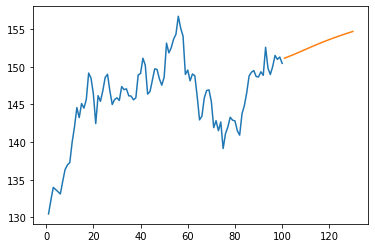

In [38]:
plt.plot(day_new,scaler.inverse_transform(df[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

* So, Here The Orange Line shows us our predictions of next 30 days of Apples stock.

**That's actually all for this Project. Hope you will like it.**

## Thank you.🎈